<a href="https://www.kaggle.com/code/mbakhtiarsalik/twitter-sentiment-analysis?scriptVersionId=231597341" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# *Muhammad Bakhtiar Salik*

**Sentiment Analysis**


**Sentiment analysis on customerreviews to determine the overall sentiment (positive,negative, neutral).**


**First Step: Download the dataset & load it in Pandas.**

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv")  # Update with the actual filename
df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


**As the last column has no name so naming it "Review"**

In [2]:
# Rename columns properly
df.columns = ["ID", "Platform", "Sentiment", "Review"]  

# Check if it worked
print(df.head())

     ID   Platform Sentiment  \
0   352     Amazon   Neutral   
1  8312  Microsoft  Negative   
2  4371      CS-GO  Negative   
3  4433     Google   Neutral   
4  6273       FIFA  Negative   

                                              Review  
0  BBC News - Amazon boss Jeff Bezos rejects clai...  
1  @Microsoft Why do I pay for WORD when it funct...  
2  CSGO matchmaking is so full of closet hacking,...  
3  Now the President is slapping Americans in the...  
4  Hi @EAHelp I’ve had Madeleine McCann in my cel...  


**Next Step: Cleaning the Data**

In [3]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters & numbers
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df["Cleaned_Review"] = df["Review"].apply(clean_text)  # Change "Review" to your actual text column name
df.head()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,ID,Platform,Sentiment,Review,Cleaned_Review
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
3,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp ive madeleine mccann cellar past yea...


**dataset is cleaned and prepped for analysis.**

**Doing Exploratory Data Analysis (EDA)**

**Checking for Missing Values**

In [4]:
print(df.isnull().sum())

ID                0
Platform          0
Sentiment         0
Review            0
Cleaned_Review    0
dtype: int64


**Checking for Data Distribution**

In [5]:
print(df["Sentiment"].value_counts())

Sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64


**Visualizing sentiment distribution:**

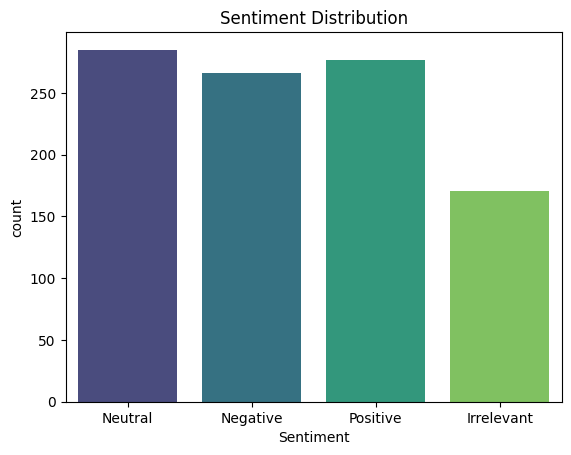

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Sentiment", data=df, palette="viridis")
plt.title("Sentiment Distribution")
plt.show()

**Check text length distribution:**
This helps understand if longer reviews have different sentiments.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


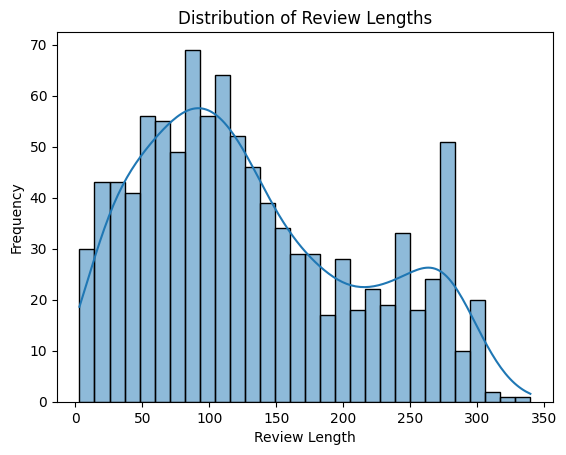

In [7]:
df["Review_Length"] = df["Review"].apply(lambda x: len(str(x)))
sns.histplot(df["Review_Length"], bins=30, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

**Word Cloud for each sentiment:**
Let’s see the most common words in Positive, Negative, Neutral, and Irrelevant reviews.

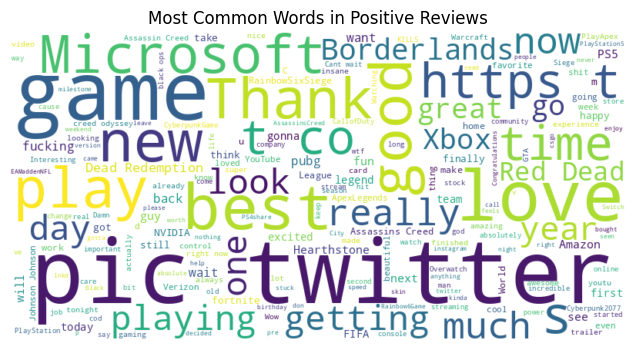

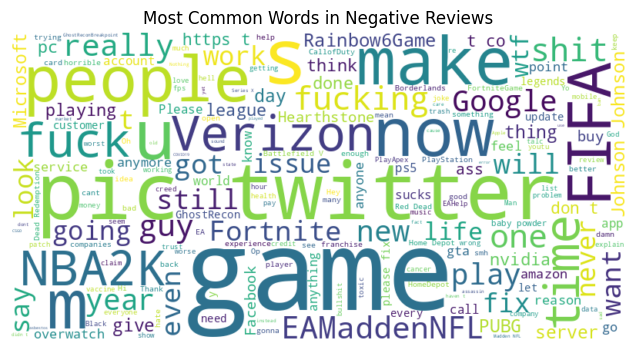

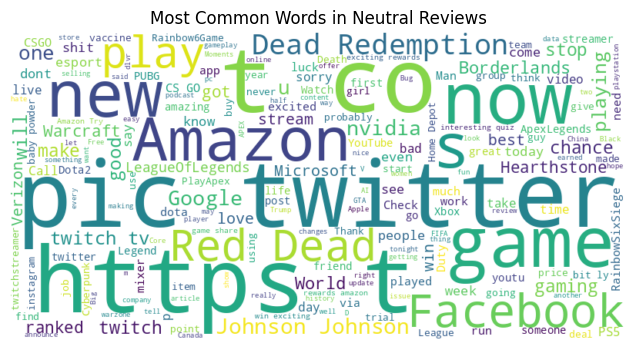

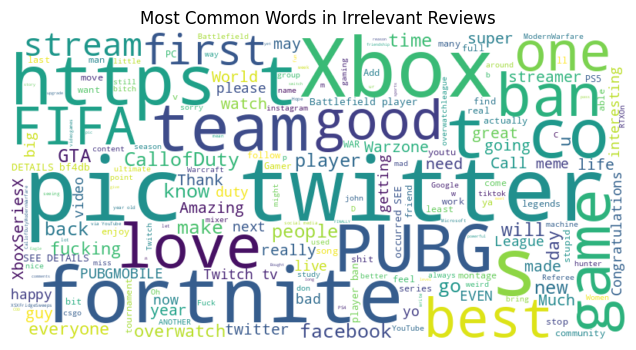

In [8]:
from wordcloud import WordCloud

sentiments = ["Positive", "Negative", "Neutral", "Irrelevant"]

for sentiment in sentiments:
    text = " ".join(df[df["Sentiment"] == sentiment]["Review"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Most Common Words in {sentiment} Reviews")
    plt.show()

**Feature Engineering!**
We need to prepare our text data for model training. Here's what we’ll do:

In [9]:
sentiment_mapping = {"Positive": 1, "Negative": -1, "Neutral": 0, "Irrelevant": 2}
df["Sentiment_Label"] = df["Sentiment"].map(sentiment_mapping)
df.head()

,ID,Platform,Sentiment,Review,Cleaned_Review,Review_Length,Sentiment_Label
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...,109,0
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...,91,-1
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...,71,-1
3,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...,170,0
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp ive madeleine mccann cellar past yea...,268,-1


**Tokenization, Stopword Removal, and Lemmatization**
This helps clean the text further before vectorizing it.

In [10]:
import nltk
nltk.download('omw-1.4')  # Open Multilingual Wordnet (sometimes required)
nltk.download('wordnet')  # Download WordNet again

import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')  # Extra WordNet dependency

import os
nltk.data.path.append(os.path.expanduser('~/nltk_data'))


[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:
nltk.download('wordnet', download_dir='/root/nltk_data')
nltk.data.path.append('/root/nltk_data')  # Add this path to NLTK's data path

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [12]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import nltk
nltk.download('all')  # This will download all NLTK data (may take time)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron

True

In [13]:
import nltk
import os

# Download the required datasets
nltk.download('punkt', download_dir='/root/nltk_data')
nltk.download('wordnet', download_dir='/root/nltk_data')
nltk.download('stopwords', download_dir='/root/nltk_data')
nltk.download('omw-1.4', download_dir='/root/nltk_data')

# Set the NLTK data path
nltk.data.path.append('/root/nltk_data')

# Verify the download
try:
    from nltk.corpus import wordnet
    print("WordNet loaded successfully!")
except LookupError:
    print("Still having issues - trying alternative approach")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
WordNet loaded successfully!


**I used Sapce cuz it was lacking to retrieve my data, there was a glitch.**

In [14]:
!pip install spacy
!python -m spacy download en_core_web_sm

import spacy
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    doc = nlp(text.lower())
    words = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return " ".join(words)

df["Processed_Review"] = df["Review"].apply(preprocess_text)
df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 82.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


,ID,Platform,Sentiment,Review,Cleaned_Review,Review_Length,Sentiment_Label,Processed_Review
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...,109,0,bbc news amazon boss jeff bezos rejects claim ...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...,91,-1,pay word function poorly chromebook
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...,71,-1,csgo matchmaking closet hacking truly awful game
3,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...,170,0,president slap americans face commit unlawful ...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp ive madeleine mccann cellar past yea...,268,-1,hi madeleine mccann cellar past year little sn...


In [15]:
# Install spaCy and download the English language model
!pip install spacy
!python -m spacy download en_core_web_sm

import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Define preprocessing function
def preprocess_text(text):
    doc = nlp(text.lower())  # Process text (tokenization, lemmatization, etc.)
    words = [
        token.lemma_  # Get lemma (base form)
        for token in doc
        if token.is_alpha and not token.is_stop  # Keep only alphabetic words & remove stopwords
    ]
    return " ".join(words)

# Apply preprocessing to DataFrame
df["Processed_Review"] = df["Review"].apply(preprocess_text)
df.head()

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


,ID,Platform,Sentiment,Review,Cleaned_Review,Review_Length,Sentiment_Label,Processed_Review
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...,109,0,bbc news amazon boss jeff bezos rejects claim ...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...,91,-1,pay word function poorly chromebook
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...,71,-1,csgo matchmaking closet hacking truly awful game
3,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...,170,0,president slap americans face commit unlawful ...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp ive madeleine mccann cellar past yea...,268,-1,hi madeleine mccann cellar past year little sn...


**Vectorization**

Now that we have cleaned and preprocessed the text, we need to convert it into a numerical format that machine learning models can understand.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency

# Fit and transform the Processed_Review column
X_tfidf = tfidf_vectorizer.fit_transform(df["Processed_Review"])

# Convert to DataFrame (Optional, for visualization)
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display some transformed data
print(tfidf_df.shape)  # Check dimensions (rows = samples, cols = features)
tfidf_df.head()  # See a preview of TF-IDF transformed text


(999, 3469)


,aaaahhh,ab,abella,abhijeet,ability,able,abortion,absolute,absolutely,abstract,...,zambian,zard,zen,zero,zip,zombie,zone,zoom,zysola,𝐍𝐄𝐖𝐒𝐔𝐏𝐃𝐀𝐓𝐄𝐒
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Model Training**

Now, let’s move on to training a classification model for sentiment analysis!

In [17]:
sample_texts = ["This is great!", "I hate this!", "Amazing product!"]
tfidf_test = TfidfVectorizer()
print(tfidf_test.fit_transform(sample_texts).toarray())

[[0.         0.62276601 0.         0.62276601 0.         0.4736296 ]
 [0.         0.         0.79596054 0.         0.         0.60534851]
 [0.70710678 0.         0.         0.         0.70710678 0.        ]]


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Vectorize text data (convert words to numbers)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Review'])
y = df['Sentiment']  # Ensure this column exists

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5150
Confusion Matrix:
 [[ 5  9  6 17]
 [ 1 34 10  7]
 [ 1 10 33 15]
 [ 2  6 13 31]]
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.56      0.14      0.22        37
    Negative       0.58      0.65      0.61        52
     Neutral       0.53      0.56      0.55        59
    Positive       0.44      0.60      0.51        52

    accuracy                           0.52       200
   macro avg       0.53      0.49      0.47       200
weighted avg       0.52      0.52      0.49       200



In [19]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.56      0.14      0.22        37
    Negative       0.58      0.65      0.61        52
     Neutral       0.53      0.56      0.55        59
    Positive       0.44      0.60      0.51        52

    accuracy                           0.52       200
   macro avg       0.53      0.49      0.47       200
weighted avg       0.52      0.52      0.49       200



In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier  
model = RandomForestClassifier(n_estimators=100, random_state=42)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Enhanced TF-IDF Vectorization
vectorizer = TfidfVectorizer(
    ngram_range=(1,2),  # Use both unigrams and bigrams
    sublinear_tf=True,  # Scale term frequency logarithmically
    stop_words='english',  # Remove common stopwords
    min_df=2,  # Ignore very rare words
    max_df=0.9  # Ignore overly common words
)

X = vectorizer.fit_transform(df['Processed_Review'])
y = df['Sentiment']  

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [2, 10, 100]}  # Regularization strength
log_reg = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), param_grid, cv=5)
log_reg.fit(X_train, y_train)

# Best model
best_model = log_reg.best_estimator_

# Evaluate
y_pred = best_model.predict(X_test)

print(f"Best C: {log_reg.best_params_['C']}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best C: 2
Accuracy: 0.5100
Confusion Matrix:
 [[14  8  3 12]
 [ 6 34  6  6]
 [ 6 11 30 12]
 [11  5 12 24]]
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.38      0.38      0.38        37
    Negative       0.59      0.65      0.62        52
     Neutral       0.59      0.51      0.55        59
    Positive       0.44      0.46      0.45        52

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.51      0.51      0.51       200



In [21]:
# Install required libraries if not installed
!pip install spacy
!python -m spacy download en_core_web_sm

# Import libraries
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Preprocessing function
def preprocess_text(text):
    doc = nlp(text.lower())  # Tokenize, lemmatize, remove stopwords
    words = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return " ".join(words)

# Load dataset (Make sure 'df' has 'Review' and 'Sentiment' columns)
# df = pd.read_csv("your_dataset.csv")  # Uncomment if loading from a file

# Apply text preprocessing
df["Processed_Review"] = df["Review"].apply(preprocess_text)

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["Processed_Review"])
y = df["Sentiment"]  # Ensure this column exists

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Accuracy: 0.4600
Confusion Matrix:
 [[ 7 12  0 18]
 [ 1 32 10  9]
 [ 1 22 23 13]
 [ 3 13  6 30]]
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.58      0.19      0.29        37
    Negative       0.41      0.62      0.49        52
     Neutral       0.59      0.39      0.47        59
    Positive       0.43      0.58      0.49        52

    accuracy                           0.46       200
   macro avg       0.50      0.44      0.43       200
weighted avg       

**Thanks for joining me, This model accuracy is not too good but it's also beacuse we have limited amount of data the more data the better the model and netter accuracy.**